Data 
    
    - Collected from weight.csv file and applied two columns( weighted_value, IsHS) only. 
    - Manipulated four models(Random-Forest, LogisticRegression,AdaBoostClassifier and KNeighborsClassifier)
    - Selected the best model to predict a label value whether a HS Comment or No HS Comment.
    - Calculated a confusion matrix (Accuracy, Precision,Recall, F1-Score). 


In [1]:
import pandas as pd
import numpy as np
from glob import glob 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import math 
import gspread 
import os 
from oauth2client.service_account import ServiceAccountCredentials

import pickle
import joblib

In [2]:
scope = ["https://spreadsheets.google.com/feeds", 'https://www.googleapis.com/auth/drive']

creds= ServiceAccountCredentials.from_json_keyfile_name('hs_data_sheet.json',scope)
client = gspread.authorize(creds)
HS_Accuracy =client.open('HS_Accuracy')

weighted_value_by_sentence = HS_Accuracy.get_worksheet(4)   #annotate_here

weighted_value_by_sentence_val=weighted_value_by_sentence.get_all_records()
weighted_value_by_sentence_list=[]
for index in range(len(weighted_value_by_sentence_val)):
    for key in weighted_value_by_sentence_val[index]:
        if key=='MsgUniSeg':
            MsgUniSeg_key=weighted_value_by_sentence_val[index][key]
        elif key=='Weighted_Value':
            Weighted_Value_key =weighted_value_by_sentence_val[index][key]
        elif key=='IsHS':
            IsHS=weighted_value_by_sentence_val[index][key]
        else:pass
    weighted_value_by_sentence_list.append([MsgUniSeg_key,Weighted_Value_key,IsHS])

#Create annotate_here dataframe 
weighted_val_new = pd.DataFrame(weighted_value_by_sentence_list, columns=['MsgUniSeg','Weighted_Value','IsHS'])


# Preprocessing Step

In [3]:
print(weighted_val_new.dtypes)

MsgUniSeg          object
Weighted_Value    float64
IsHS                int64
dtype: object


In [4]:
# Check missing values in a given dataset
weighted_val_new.isna().sum()

MsgUniSeg         0
Weighted_Value    0
IsHS              0
dtype: int64

In [5]:
weighted_val_new.shape

(15347, 3)

In [6]:
weighted_val_updated =weighted_val_new.dropna()

In [7]:
weighted_val_updated.isna().sum()

MsgUniSeg         0
Weighted_Value    0
IsHS              0
dtype: int64

In [8]:
weighted_val_updated.shape

(15347, 3)

In [9]:
# Statistical summary of all attributes

statistical_summary = weighted_val_updated.describe()
statistical_summary

,Weighted_Value,IsHS
count,15347.000000,15347.000000
mean,0.266889,0.198866
std,0.310372,0.399160
min,0.000000,0.000000
25%,0.085052,0.000000
50%,0.200743,0.000000
75%,0.358344,0.000000
max,7.256743,1.000000


#### Here, maximum number of weighted_value is 3.642369 and minimum number of weighted_value is 0.0. 

In [10]:
weighted_val_updated.isna().sum()

MsgUniSeg         0
Weighted_Value    0
IsHS              0
dtype: int64

In [11]:
weighted_val_updated['IsHS'].value_counts()

0    12295
1     3052
Name: IsHS, dtype: int64

In [12]:
weighted_val_updated.columns

Index(['MsgUniSeg', 'Weighted_Value', 'IsHS'], dtype='object')

In [13]:
X=weighted_val_updated[['Weighted_Value']]

In [14]:
 weighted_val_updated['IsHS'].unique()

array([1, 0])

In [15]:
# y is a vector, hence we use dot to access 'label'
y = weighted_val_updated[['IsHS']]

In [16]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,random_state=1)

In [17]:
## Apply RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = (rf_model.predict_proba(X_test))
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 0.7755205914228209
RF test roc-auc: 0.7053429811474778


In [18]:
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.7179866667102786
Logistic test roc-auc: 0.7047653432579659


In [19]:
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.7346751666524927
Adaboost test roc-auc: 0.7150409073052418


In [20]:
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.7004402635039219
Adaboost test roc-auc: 0.645954944539106


In [21]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print(' test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

 test roc-auc: 0.6988484936652721


In [22]:
pd.concat(pred,axis=1).mean(axis=1)

0       0.405725
1       0.305991
2       0.156768
3       0.156768
4       0.174704
          ...   
4600    0.270073
4601    0.324286
4602    0.207028
4603    0.352670
4604    0.174704
Length: 4605, dtype: float64

In [23]:
#### Calculate the ROc Curve
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
# thresholds

In [24]:
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
65,0.515358,0.811075
63,0.521043,0.810858
64,0.518146,0.810858
66,0.513650,0.810858
70,0.497550,0.810641


In [25]:
# print the first predicted probabilities of class membership
y_pred_class =(rf_model.predict_proba(X_test)[:,1] >=0.3).astype(bool)

In [26]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)

#[row, column]
TP = confusion[1, 1]  
TN = confusion[0, 0] 
FP = confusion[0, 1] 
FN = confusion[1, 0]  


[[3055  628]
 [ 496  426]]


In [27]:
# use float to perform true division, not integer division
Accuracy =(TP + TN) / float(TP + TN + FP + FN)

print("Accuracy  :  ",Accuracy)
print("Accuracy  :  ",metrics.accuracy_score(y_test, y_pred_class))

Accuracy  :   0.7559174809989142
Accuracy  :   0.7559174809989142


In [28]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.24408251900108577
0.2440825190010858


In [29]:
sensitivity_recall = TP / float(FN + TP)   # True Positive Rate


print("Recall           : ",sensitivity_recall)

print("Metric Recall    : ",metrics.recall_score(y_test, y_pred_class))

Recall           :  0.46203904555314534
Metric Recall    :  0.46203904555314534


In [30]:
specificity = TN / (TN + FP)  

print(specificity)

0.8294868313874558


In [31]:
false_positive_rate = FP / float(TN + FP)   # False Positive Rate

print(false_positive_rate)
print(1 - specificity)

0.17051316861254412
0.17051316861254417


In [32]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred_class))

0.40417457305502846
0.40417457305502846


In [33]:
F1=2*((precision*sensitivity_recall)/(precision+sensitivity_recall))


In [34]:
print("Accuracy     :   ",Accuracy)
print("Precision    :   ",precision)
print("Recall       :   ",sensitivity_recall)
print("F1 Score     :   ",F1)

Accuracy     :    0.7559174809989142
Precision    :    0.40417457305502846
Recall       :    0.46203904555314534
F1 Score     :    0.4311740890688259


In [35]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

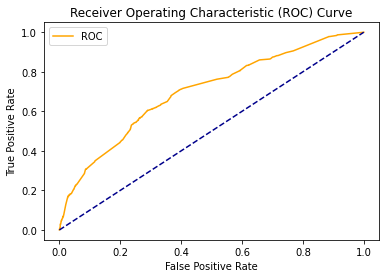

In [36]:
plot_roc_curve(fpr,tpr)

In [37]:
from sklearn.metrics import precision_recall_fscore_support as score

In [38]:
y_pred = rf_model.predict(X_test)

# print the first predicted probabilities of class membership
y_pred_class =(rf_model.predict_proba(X_test)[:,1] >=0.3).astype(bool)


precision, recall,fscore,support = score(y_test,y_pred_class,pos_label=1,average='binary')

print('Precision : {} / Recall : {}  / F1 Score : {}'.format(round(precision,3),round(recall,3),round(fscore,3)))

Precision : 0.404 / Recall : 0.462  / F1 Score : 0.431


In [39]:
model_Name = 'final_sentence_lex_train.pkl'
joblib.dump(model,model_Name)

['final_sentence_lex_train.pkl']

In [40]:
# load the model from disk

loaded_model = joblib.load(model_Name)
result = loaded_model.score(X_test,y_test)
print(result)

0.7350705754614549


## Prediction Pipeline

In [41]:
import sentence_weight_func as weight 
import pandas as pd 
from importlib import reload
from tqdm import tqdm

reload(weight);

In [42]:
weight_value = pd.read_csv('example.csv')

In [43]:
lexicon_weight = weight.weight_calculation_sentence(weight_value)

In [44]:
lexicon_weight

[['ကုလားတွေ',
  'ဗမာတွေ ကို ပဲ အပြစ်ပြော ရဲ ကျ တယ် ဟို ရင် တစ် ချိန် က ဘူး သီး တောင် မောင် တော မှာ ကု လ ားတွေ ဖင် ဝိုင်း လိုး တော့ ကု လ ား တွေ ကို မ ပြော ရဲ ကျ ဘူး ဖင် ချ မှာ ကြောက် လို့ လား',
  nan,
  0],
 ['ကုလားတွေ',
  'ပြည် သူ တွေ အကာ ကွယ် လုပ် ချင် လုပ် မ လုပ် ချင် နေကာ ကွယ် နေ တဲ့ သူ တွေ လည်း အသေ ပဲး သေ ရဲ ရင်ကာ ကွယ် ဘယ်သူ မ လွတ် တော့ ဘူး ပြည် သူ ကို ချစ် ရင် ပြည် သူ တွေ ဒုက္ခ မ ရောက် အောင် လုပ် လား ထွန်း မြတ် နိူင် ခိုင် သုခ ပြေား လိုက် ရင် ပြည် သူ ချစ် တော် ကြီး ဘာ တွေ ကာကွယ် ဖူး ပီ လည်း ပြည် သူ တွေ ကို မူ စ လင် ကုလားတွေ ဖင် လုပ် ပီး သက် ပြစ် တာ တောင် ဘာ မ လုပ် ပေး တဲ့ AA သူပုန် မူ စ လင် ကုလား အဖေ ခေါ် တဲ့ ထွန် မြတ် နိူင် ခိုင် သုခ',
  'AA သူပုန်,  မူ စ လင် ကုလား',
  0.6492536999999999],
 ['ကြံ့ဖွတ်',
  'ဒီလို ပဲ မ ထူး ဇာတ်ခင်း ပြီး မိုက်တွင်းနက် နေ မယ် ဆို ရင် တိုင်းပြည် လည်း ဆင်းရဲ တွင်း က ထွက် နိုင် မှာ မဟုတ် ဘူး ။ ကြံ့ဖွတ် လည်း န လန် ထူ နိုင် စရာ အကြောင်း မ မြင် ၊ နစ် ပြီး ရင်း နစ် မယ့် လူ တွေ တိုင်း ပြ ည ကို ပါ ဆွဲချ ချင် နေ တာ',
  nan,
  0.3242259],
 ['စစ်ခွေး',
  'ဒေ အစိ

In [45]:
def Extract(lexicon_weight): 
    return [[item[-1]] for item in lexicon_weight] 

In [46]:
X_test_input = Extract(lexicon_weight)

In [47]:
X_test_input

[[0], [0.6492536999999999], [0.3242259], [0.3583441]]

In [48]:
#make a prediction
ynew =rf_model.predict(X_test_input)

ynew_pd = pd.Series(ynew, name='IsHS')
ynew_pd

0    0
1    1
2    0
3    0
Name: IsHS, dtype: int64

In [49]:
# Show a result pandas dataframe
weight_prediction_result = pd.concat([weight_value, ynew_pd], axis=1)

In [50]:
weight_prediction_result

,LexFound,MsgUniSeg,NewHSWordInSentence,IsHS
0,ကုလားတွေ,ဗမာတွေ ကို ပဲ အပြစ်ပြော ရဲ ကျ တယ် ဟို ရင် တစ် ...,NaN,0
1,ကုလားတွေ,ပြည် သူ တွေ အကာ ကွယ် လုပ် ချင် လုပ် မ လုပ် ချင...,"AA သူပုန်, မူ စ လင် ကုလား",1
2,ကြံ့ဖွတ်,ဒီလို ပဲ မ ထူး ဇာတ်ခင်း ပြီး မိုက်တွင်းနက် နေ ...,NaN,0
3,စစ်ခွေး,ဒေ အစိုးရ လည်း အမှတ်မရှိ အရင် တုံး က လည်း တစ်ခ...,NaN,0
